Lasso and Ridge regression are two popular techniques in machine learning for **feature selection and regularization**. Both methods are used to overcome the issue of **overfitting**, which can occur when there are too many features in a model compared to the number of data points available.

Ridge regression is a regularization method that adds a penalty term to the model's coefficients to prevent them from getting too large. This helps to control the variance of the model and avoid overfitting. Ridge regression works well when there are many correlated predictors in the data. It shrinks the coefficients of correlated predictors towards each other and thus reduces the variance of the model.

Lasso regression is another regularization technique that, like Ridge regression, adds a penalty term to the model's coefficients. The key difference is that the Lasso penalty term uses the **absolute value of the coefficients instead of their squares**. This has the effect of driving some coefficients to zero, which can be used to perform feature selection. In other words, Lasso regression can identify which features are most important for predicting the outcome variable.

In Python, you can use various libraries such as **scikit-learn, NumPy, and Pandas** to implement Lasso and Ridge regression. In this notebook, I use these packages to determine which different factors are important in ascertaining the price of a house.

# Step 1: Preparing the Data

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/441_Lecture_2/insurance.csv')

In [ ]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Encoding categorical variables
df1.loc[df1["sex"] == "female","sex"] = 1
df1.loc[df1["sex"] == "male","sex"] = 0

In [ ]:
df1.loc[df1["smoker"] == "yes","smoker"] = 1
df1.loc[df1["smoker"] == "no","smoker"] = 0

In [ ]:
df1.loc[df1["region"] == "northeast","region"] = 1
df1.loc[df1["region"] == "northwest","region"] = 2
df1.loc[df1["region"] == "southeast","region"] = 3
df1.loc[df1["region"] == "southwest","region"] = 4

In [ ]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,4,16884.92400
1,18,0,33.770,1,0,3,1725.55230
2,28,0,33.000,3,0,3,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,3,1629.83350
1336,21,1,25.800,0,0,4,2007.94500


# Step 2: Splitting the Data into Training and Testing Set

In [ ]:
import numpy as np
data1 = np.array(df1.iloc[:, :-1])
target1 = np.array(df1.iloc[:, -1])

In [ ]:
cut1 = int((len(data1) * .8) // 1)

In [ ]:
in_data1 = data1[:cut1]
out_data1 = data1[cut1:]

in_target1 = target1[:cut1]
out_target1 = target1[cut1:]

# Step 3: Normalizing the Data

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler1 = preprocessing.StandardScaler().fit(in_data1)
in_data_scale1 = scaler1.transform(in_data1)

out_data_scale1 = scaler1.transform(out_data1)

# Step 4: Getting lambda from Lasso Cross Validation

In [ ]:
from sklearn.linear_model import LassoCV
modCV2 = LassoCV().fit(in_data_scale1, in_target1)

In [ ]:
l = modCV2.alpha_
l

133.34880015958146

# Step 5: Lasso Regression with that Lambda

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = l).fit(in_data_scale1, in_target1)

In [ ]:
coeffs = model.coef_

In [ ]:
coeffs

array([3564.26137833,    0.        , 1890.8527485 ,  398.24050447,
       9324.84227138, -326.52198757])

# Step 6: Visualizing the coefficients 

In [ ]:
cols = df1.columns[:-1]
cols

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

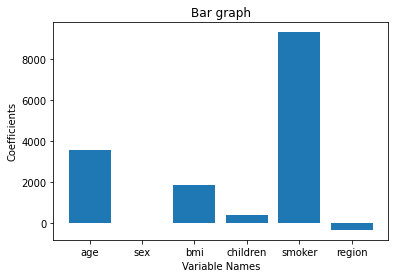

In [ ]:
import matplotlib.pyplot as plt

# x- and y-axis values
x = cols
y = coeffs

# plotting the bar graph
plt.bar(x, y)
plt.xlabel('Variable Names')
plt.ylabel('Coefficients')
plt.title('Bar graph')
plt.show()


# Step 7: Interpretting the coefficients

We can interpret the coefficients as, age, being a female, bmi, children, and being a smoker, has a positive impact on the price of the house, while that of region has a negative impact. When gauging the feature selection we can conclude that being a smoker has the biggest impact on y, while the number of children has the least impact.

# Step 8: Comparing in and out of sample MSE’s

In [ ]:
from sklearn.metrics import mean_squared_error
in_sample_mse = mean_squared_error(model.predict(in_data_scale1), in_target1)
print(f'In-sample MSE: {in_sample_mse}')

In-sample MSE: 36490415.101693384


In [ ]:
out_sample_mse = mean_squared_error(model.predict(out_data_scale1), out_target1)
print(f'Out-sample MSE: {out_sample_mse}')

Out-sample MSE: 37252730.724018715


The out of sample MSE is higher than the in sample MSE.